# Examing Data from COVID-19 Outbreak

#### Import Libraries

In [1]:
import pandas as pd
from datetime import date, timedelta
import xlrd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import folium

#### Import Latest XLS from ECDC website

In [2]:
today = date.today()

In [3]:
day = today.strftime("%d")
month = today.strftime("%m")

In [4]:
url  = "https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide-2020-{}-{}.xlsx".format(month, day)

In [5]:
url

'https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide-2020-05-12.xlsx'

#### Load into DataFrame

In [6]:
df = pd.read_excel(url)

In [7]:
df

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018,continentExp
0,2020-05-12,12,5,2020,285,2,Afghanistan,AF,AFG,37172386.0,Asia
1,2020-05-11,11,5,2020,369,5,Afghanistan,AF,AFG,37172386.0,Asia
2,2020-05-10,10,5,2020,255,6,Afghanistan,AF,AFG,37172386.0,Asia
3,2020-05-09,9,5,2020,215,3,Afghanistan,AF,AFG,37172386.0,Asia
4,2020-05-08,8,5,2020,171,2,Afghanistan,AF,AFG,37172386.0,Asia
...,...,...,...,...,...,...,...,...,...,...,...
16525,2020-03-25,25,3,2020,0,0,Zimbabwe,ZW,ZWE,14439018.0,Africa
16526,2020-03-24,24,3,2020,0,1,Zimbabwe,ZW,ZWE,14439018.0,Africa
16527,2020-03-23,23,3,2020,0,0,Zimbabwe,ZW,ZWE,14439018.0,Africa
16528,2020-03-22,22,3,2020,1,0,Zimbabwe,ZW,ZWE,14439018.0,Africa


#### Fix Date format from Excel to DateTime

In [8]:
#def read_date(date):
#    return xlrd.xldate.xldate_as_datetime(date, 0)

In [9]:
#df['DateRep'] = pd.to_datetime(df['DateRep'].apply(read_date), errors='coerce')

In [10]:
df

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018,continentExp
0,2020-05-12,12,5,2020,285,2,Afghanistan,AF,AFG,37172386.0,Asia
1,2020-05-11,11,5,2020,369,5,Afghanistan,AF,AFG,37172386.0,Asia
2,2020-05-10,10,5,2020,255,6,Afghanistan,AF,AFG,37172386.0,Asia
3,2020-05-09,9,5,2020,215,3,Afghanistan,AF,AFG,37172386.0,Asia
4,2020-05-08,8,5,2020,171,2,Afghanistan,AF,AFG,37172386.0,Asia
...,...,...,...,...,...,...,...,...,...,...,...
16525,2020-03-25,25,3,2020,0,0,Zimbabwe,ZW,ZWE,14439018.0,Africa
16526,2020-03-24,24,3,2020,0,1,Zimbabwe,ZW,ZWE,14439018.0,Africa
16527,2020-03-23,23,3,2020,0,0,Zimbabwe,ZW,ZWE,14439018.0,Africa
16528,2020-03-22,22,3,2020,1,0,Zimbabwe,ZW,ZWE,14439018.0,Africa


#### Set Date as Index

In [11]:
df.set_index('dateRep', inplace=True)
df = df.sort_index()

In [12]:
df

,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018,continentExp
dateRep,,,,,,,,,,
2019-12-31,31,12,2019,0,0,Luxembourg,LU,LUX,607728.0,Europe
2019-12-31,31,12,2019,0,0,United_Arab_Emirates,AE,ARE,9630959.0,Asia
2019-12-31,31,12,2019,0,0,Philippines,PH,PHL,106651922.0,Asia
2019-12-31,31,12,2019,0,0,Egypt,EG,EGY,98423595.0,Africa
2019-12-31,31,12,2019,0,0,Japan,JP,JPN,126529100.0,Asia
...,...,...,...,...,...,...,...,...,...,...
2020-05-12,12,5,2020,744,179,Italy,IT,ITA,60431283.0,Europe
2020-05-12,12,5,2020,29,6,Israel,IL,ISR,8883800.0,Asia
2020-05-12,12,5,2020,3877,210,United_Kingdom,UK,GBR,66488991.0,Europe


In [13]:
countries = df['countriesAndTerritories'].values
np.unique(countries)

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua_and_Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia',
       'Bonaire, Saint Eustatius and Saba', 'Bosnia_and_Herzegovina',
       'Botswana', 'Brazil', 'British_Virgin_Islands',
       'Brunei_Darussalam', 'Bulgaria', 'Burkina_Faso', 'Burundi',
       'Cambodia', 'Cameroon', 'Canada', 'Cape_Verde',
       'Cases_on_an_international_conveyance_Japan', 'Cayman_Islands',
       'Central_African_Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo', 'Costa_Rica', 'Cote_dIvoire', 'Croatia',
       'Cuba', 'CuraÃ§ao', 'Cyprus', 'Czechia',
       'Democratic_Republic_of_the_Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican_Republic', 'Ecuador', 'Egypt',
       'El_Salvador', 'Equatorial_Guinea', 'Er

#### Fix Inconsistent Capitalisation of Country Names

In [14]:
#df.replace(['United kingdom', 'Czech republic', 'switzerland', 'CANADA'], ['United Kingdom', 'Czech Republic', 'Switzerland', 'Canada'], inplace=True)

In [15]:
#countries = df['countriesAndTerritories'].values
#np.unique(countries)

#### Examine Global Numbers

In [16]:
df_global = df[['cases', 'deaths']].groupby(df.index).sum()

In [17]:
df_global.head()

,cases,deaths
dateRep,,
2019-12-31,27,0
2020-01-01,0,0
2020-01-02,0,0
2020-01-03,17,0
2020-01-04,0,0


In [18]:
df_global['Total_Cases'] = df_global['cases'].cumsum()
df_global['Total_Deaths'] = df_global['deaths'].cumsum()

In [19]:
df_global

,cases,deaths,Total_Cases,Total_Deaths
dateRep,,,,
2019-12-31,27,0,27,0
2020-01-01,0,0,27,0
2020-01-02,0,0,27,0
2020-01-03,17,0,44,0
2020-01-04,0,0,44,0
...,...,...,...,...
2020-05-08,94422,5748,3809238,269249
2020-05-09,90117,5268,3899355,274517
2020-05-10,87552,4440,3986907,278957


#### Total Confirmed Cases and Deaths Globally

In [20]:
df_global.cases.sum()

4137193

In [21]:
df_global.deaths.sum()

285760

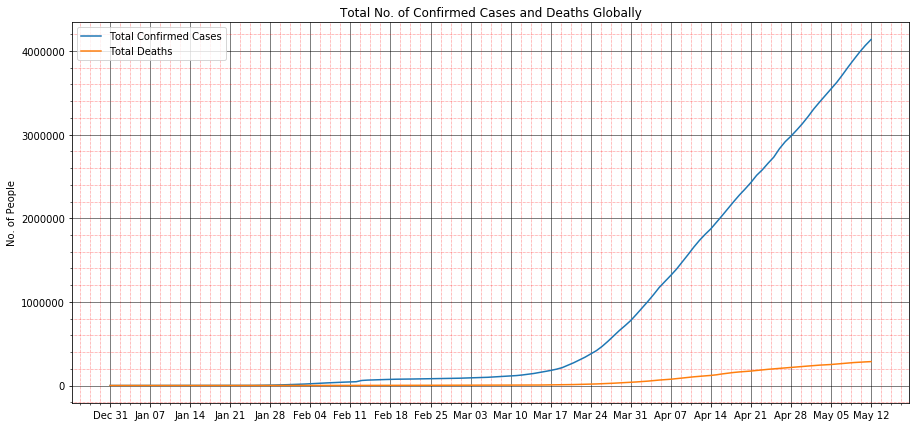

In [22]:
#plot data
fig, ax = plt.subplots(figsize=(15,7))
ax.plot(df_global.index, df_global['Total_Cases'])
ax.plot(df_global.index, df_global['Total_Deaths'])

#set ticks every week
ax.xaxis.set_major_locator(mdates.WeekdayLocator())
#set major ticks format
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))

# Turn on the grid
plt.minorticks_on()
plt.grid(which='major', linestyle='-', linewidth='0.5', color='black')
# Customize the minor grid
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='red')
ax.set_ylabel('No. of People')

plt.title("Total No. of Confirmed Cases and Deaths Globally")

plt.legend(['Total Confirmed Cases', 'Total Deaths'])

plt.savefig('Images/' + str(today) + ' Total No. of Confirmed Cases and Deaths Globally.png')

plt.show()

#### Daily New Confirmed Cases and Deaths Globally

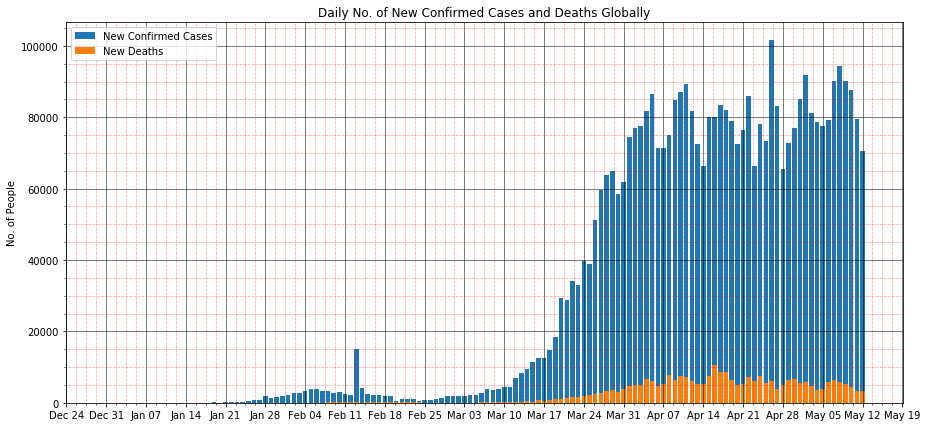

In [23]:
#plot data
fig, ax = plt.subplots(figsize=(15,7))
ax.bar(df_global.index, df_global['cases'])
ax.bar(df_global.index, df_global['deaths'])

#set ticks every week
ax.xaxis.set_major_locator(mdates.WeekdayLocator())
#set major ticks format
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))

# Turn on the grid
plt.minorticks_on()
plt.grid(which='major', linestyle='-', linewidth='0.5', color='black')
# Customize the minor grid
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='red')
ax.set_ylabel('No. of People')

plt.title("Daily No. of New Confirmed Cases and Deaths Globally")

plt.legend(['New Confirmed Cases', 'New Deaths'])

plt.savefig('Images/' + str(today) + ' Daily No. of New Confirmed Cases and Deaths Globally.png')

plt.show()

#### Top 20 Countries with the Most Confirmed Cases and Deaths

In [24]:
df_countries = df.set_index('countriesAndTerritories')

In [25]:
df_countries = df_countries.groupby('countriesAndTerritories').sum()

In [26]:
df_countries = df_countries.sort_values('cases', ascending=True)

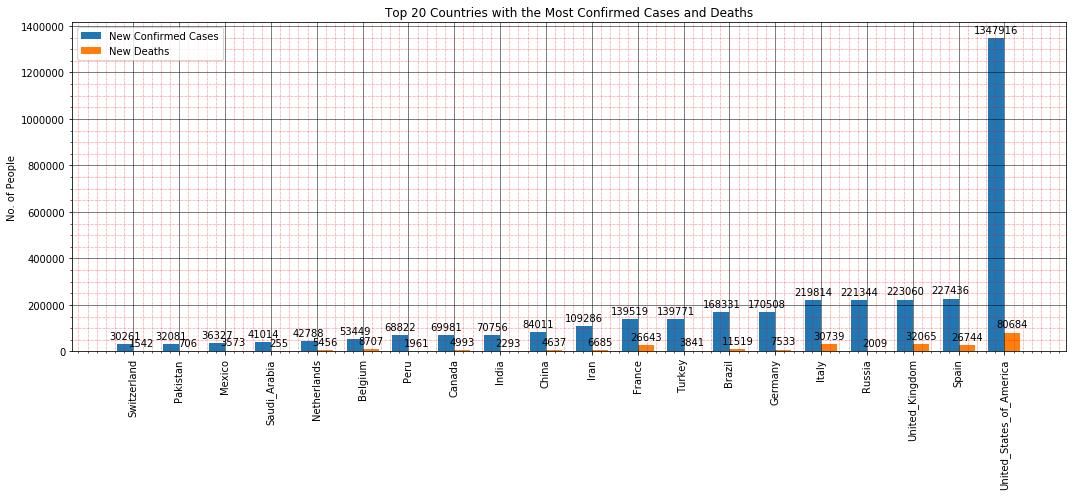

In [27]:
#plot data
labels = df_countries.index[-20:]
Cases = df_countries['cases'][-20:]
Deaths = df_countries['deaths'][-20:]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(15, 7))
rects1 = ax.bar(x - width/2, Cases, width, label='New Confirmed Cases')
rects2 = ax.bar(x + width/2, Deaths, width, label='New Deaths')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('No. of People')
ax.set_title('Top 20 Countries with the Most Confirmed Cases and Deaths')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=90)

ax.minorticks_on()
ax.grid(which='major', linestyle='-', linewidth='0.5', color='black')
ax.grid(which='minor', linestyle=':', linewidth='0.5', color='red')
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.savefig('Images/' + str(today) + ' Top 20 Countries with the Most Confirmed Cases and Deaths.png')

plt.show()

  #### Find Latest Data from Yesterday

In [28]:
yesterday = today - timedelta(days = 1)

In [29]:
df_yesterday = df.loc[yesterday]
df_yesterday.set_index('countriesAndTerritories', inplace=True)

In [30]:
df_yesterday = df_yesterday.sort_values('cases', ascending=True)

In [31]:
df_yesterday

,day,month,year,cases,deaths,geoId,countryterritoryCode,popData2018,continentExp
countriesAndTerritories,,,,,,,,,
San_Marino,11,5,2020,-9,0,SM,SMR,3.378500e+04,Europe
Liberia,11,5,2020,0,0,LR,LBR,4.818977e+06,Africa
Tunisia,11,5,2020,0,0,TN,TUN,1.156520e+07,Africa
Turks_and_Caicos_islands,11,5,2020,0,0,TC,TCA,3.145800e+04,America
Gibraltar,11,5,2020,0,0,GI,GIB,3.371800e+04,Europe
...,...,...,...,...,...,...,...,...,...
United_Kingdom,11,5,2020,3923,268,UK,GBR,6.648899e+07,Europe
India,11,5,2020,4213,97,IN,IND,1.352617e+09,Asia
Brazil,11,5,2020,6760,496,BR,BRA,2.094693e+08,America


#### Total No. of Confirmed Cases and Deaths Yesterday Globally

In [32]:
df_yesterday.cases.sum()

79642

In [33]:
df_yesterday.deaths.sum()

3410

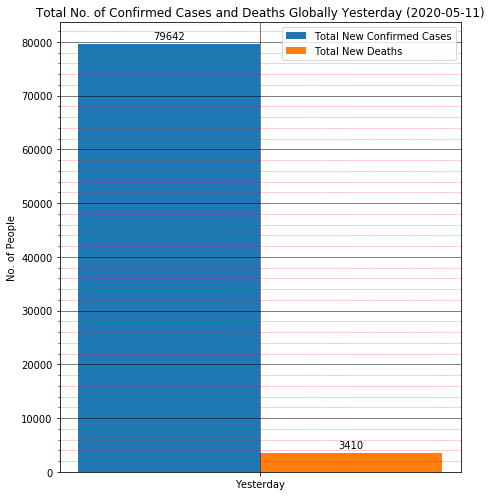

In [34]:
#plot data
labels = ['Yesterday']
Cases = df_yesterday.cases.sum()
Deaths = df_yesterday.deaths.sum()

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(7, 7))
rects1 = ax.bar(x - width/2, Cases, width, label='Total New Confirmed Cases')
rects2 = ax.bar(x + width/2, Deaths, width, label='Total New Deaths')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('No. of People')
ax.set_title('Total No. of Confirmed Cases and Deaths Globally Yesterday (' + str(yesterday) + ')')
ax.set_xticks(x)
ax.set_xticklabels(labels)

ax.minorticks_on()
ax.grid(which='major', linestyle='-', linewidth='0.5', color='black')
ax.grid(which='minor', linestyle=':', linewidth='0.5', color='red')
ax.legend()

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.savefig('Images/' + str(today) + ' Total No. of Confirmed Cases and Deaths Globally Yesterday (' + str(yesterday) + ').png')

plt.show()

#### Top 20 Countries with the Most New Confirmed Cases and Deaths Yesterday

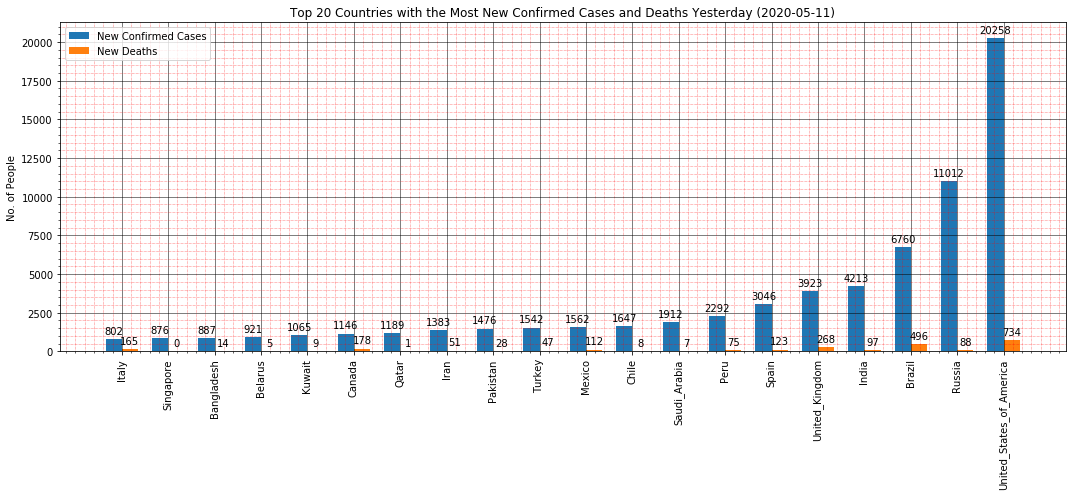

In [35]:
#plot data
labels = df_yesterday.index[-20:]
Cases = df_yesterday['cases'][-20:]
Deaths = df_yesterday['deaths'][-20:]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(15, 7))
rects1 = ax.bar(x - width/2, Cases, width, label='New Confirmed Cases')
rects2 = ax.bar(x + width/2, Deaths, width, label='New Deaths')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('No. of People')
ax.set_title('Top 20 Countries with the Most New Confirmed Cases and Deaths Yesterday (' + str(yesterday) + ')')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=90)

ax.minorticks_on()
ax.grid(which='major', linestyle='-', linewidth='0.5', color='black')
ax.grid(which='minor', linestyle=':', linewidth='0.5', color='red')
ax.legend()

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.savefig('Images/' + str(today) + ' Top 20 Countries with the Most New Confirmed Cases and Deaths Yesterday ('
            + str(yesterday) + ').png')

plt.show()

#### Find Data for Specific Countries (e.g. DE, UK, CN) and Compare

#### Function: *Daily No. of New Confirmed Cases and Deaths in X & Y*

In [49]:
def compare_daily_cases(country1, country2):
    df_sub1 = df.loc[df['geoId'] == country1]
    df_sub2 = df.loc[df['geoId'] == country2]

    #plot data
    fig, axs = plt.subplots(2, 1, figsize=(15, 10))
    axs[0].bar(df_sub1.index, df_sub1['cases'])
    axs[0].bar(df_sub1.index, df_sub1['deaths'])

    #Set 
    axs[1].bar(df_sub2.index, df_sub2['cases'])
    axs[1].bar(df_sub2.index, df_sub2['deaths'])

    #set ticks every week
    axs[0].xaxis.set_major_locator(mdates.WeekdayLocator())
    axs[0].xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
    axs[1].xaxis.set_major_locator(mdates.WeekdayLocator())
    axs[1].xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))

    #Gridlines
    axs[0].minorticks_on()
    axs[0].grid(which='major', linestyle='-', linewidth='0.5', color='black')
    axs[0].grid(which='minor', linestyle=':', linewidth='0.5', color='red')
    axs[0].set_ylabel('No. of People')

    axs[1].minorticks_on()
    axs[1].grid(which='major', linestyle='-', linewidth='0.5', color='black')
    axs[1].grid(which='minor', linestyle=':', linewidth='0.5', color='red')
    axs[1].set_ylabel('No. of People')


    #Titles
    title1 = df_sub1['countriesAndTerritories'].unique()[0]
    title2 = df_sub2['countriesAndTerritories'].unique()[0]
    axs[0].title.set_text("Daily No. of New Confirmed Cases and Deaths in " + title1)
    axs[1].title.set_text("Daily No. of New Confirmed Cases and Deaths in " + title2)

    #Legends
    axs[0].legend(['New Confirmed Cases', 'New Deaths'], loc=2)
    axs[1].legend(['New Confirmed Cases', 'New Deaths'], loc=2)

    plt.savefig('Images/' + str(today) + ' Daily No. of New Confirmed Cases and Deaths in ' + title1 + ' & ' + title2 + '.png')

    plt.show()

#### Function: *Total No. of Confirmed Cases and Deaths in X & Y*

In [48]:
def compare_total_cases(country1, country2):
    
    df_sub1 = df.loc[df['geoId'] == country1]
    df_sub2 = df.loc[df['geoId'] == country2]
    
    df_sub1['Total_Cases'] = df_sub1.loc[:,('cases')].cumsum()
    df_sub1['Total_Deaths'] = df_sub1.loc[:,('deaths')].cumsum()

    df_sub2['Total_Cases'] = df_sub2.loc[:,('cases')].cumsum()
    df_sub2['Total_Deaths'] = df_sub2.loc[:,('deaths')].cumsum()


    #plot data
    fig, axs = plt.subplots(2, 1, figsize=(15, 10))
    axs[0].plot(df_sub1.index, df_sub1['Total_Cases'])
    axs[0].plot(df_sub1.index, df_sub1['Total_Deaths'])

    #Set 
    axs[1].plot(df_sub2.index, df_sub2['Total_Cases'])
    axs[1].plot(df_sub2.index, df_sub2['Total_Deaths'])

    #set ticks every week
    axs[0].xaxis.set_major_locator(mdates.WeekdayLocator())
    axs[0].xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
    axs[1].xaxis.set_major_locator(mdates.WeekdayLocator())
    axs[1].xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))

    #Gridlines
    axs[0].minorticks_on()
    axs[0].grid(which='major', linestyle='-', linewidth='0.5', color='black')
    axs[0].grid(which='minor', linestyle=':', linewidth='0.5', color='red')
    axs[0].set_ylabel('No. of People')

    axs[1].minorticks_on()
    axs[1].grid(which='major', linestyle='-', linewidth='0.5', color='black')
    axs[1].grid(which='minor', linestyle=':', linewidth='0.5', color='red')
    axs[1].set_ylabel('No. of People')


    #Titles
    title1 = df_sub1['countriesAndTerritories'].unique()[0]
    title2 = df_sub2['countriesAndTerritories'].unique()[0]
    axs[0].title.set_text("Total No. of Confirmed Cases and Deaths in " + title1)
    axs[1].title.set_text("Total No. of Confirmed Cases and Deaths in " + title2)

    #Legends
    axs[0].legend(['Total Confirmed Cases', 'Total Deaths'], loc=2)
    axs[1].legend(['Total Confirmed Cases', 'Total Deaths'], loc=2)

    plt.savefig('Images/'+str(today) + ' Total No. of Confirmed Cases and Deaths in ' + title1 + ' & ' + title2 + '.png')

    plt.show()

#### Compare Charts

In [54]:
#AU, BR, CN, DE, ES, FR, IL, IN, IT, JP, KR, PK, TR, UK, US

country1 = 'DE'
country2 = 'FR'

In [ ]:
compare_daily_cases(country1, country2)
compare_total_cases(country1,country2)

#### Examine Cases and Deaths Across EU

In [40]:
eu_countries = ['Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Cyprus',
       'Czech_Republic', 'Denmark', 'Estonia', 'Finland', 'France',
       'Germany', 'Greece', 'Hungary', 'Ireland', 'Italy', 'Latvia',
       'Lithuania', 'Luxembourg', 'Malta', 'Netherlands', 'Poland',
       'Portugal', 'Romania', 'Slovakia', 'Slovenia', 'Spain', 'Sweden']

In [41]:
df_eu = df[df['countriesAndTerritories'].isin(eu_countries)]

In [42]:
df_eu

,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018,continentExp
dateRep,,,,,,,,,,
2019-12-31,31,12,2019,0,0,Luxembourg,LU,LUX,607728.0,Europe
2019-12-31,31,12,2019,0,0,Sweden,SE,SWE,10183175.0,Europe
2019-12-31,31,12,2019,0,0,Germany,DE,DEU,82927922.0,Europe
2019-12-31,31,12,2019,0,0,Italy,IT,ITA,60431283.0,Europe
2019-12-31,31,12,2019,0,0,Romania,RO,ROU,19473936.0,Europe
...,...,...,...,...,...,...,...,...,...,...
2020-05-12,12,5,2020,7,0,Malta,MT,MLT,483530.0,Europe
2020-05-12,12,5,2020,139,9,Ireland,IE,IRL,4853506.0,Europe
2020-05-12,12,5,2020,29,4,Hungary,HU,HUN,9768785.0,Europe


In [43]:
df_eu = df_eu.loc[:,('cases', 'deaths')]

In [44]:
df_eu

,cases,deaths
dateRep,,
2019-12-31,0,0
2019-12-31,0,0
2019-12-31,0,0
2019-12-31,0,0
2019-12-31,0,0
...,...,...
2020-05-12,7,0
2020-05-12,139,9
2020-05-12,29,4


In [45]:
df_eu_sum = df_eu.groupby('dateRep').sum().cumsum()

In [46]:
df_eu_sum

,cases,deaths
dateRep,,
2019-12-31,0,0
2020-01-01,0,0
2020-01-02,0,0
2020-01-03,0,0
2020-01-04,0,0
...,...,...
2020-05-08,993686,112806
2020-05-09,1001002,114050
2020-05-10,1006932,114756


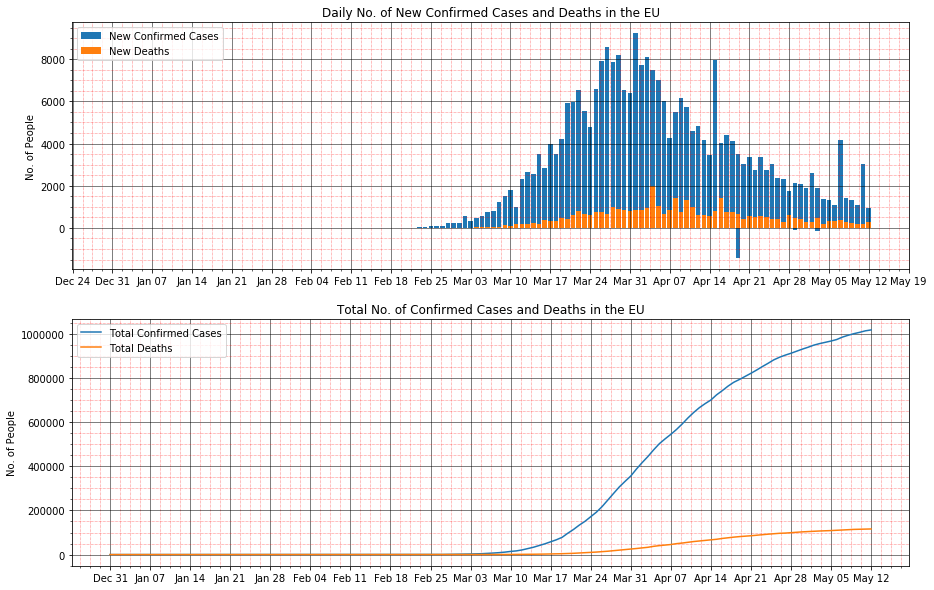

In [47]:
#plot data
fig, axs = plt.subplots(2, 1, figsize=(15, 10))
axs[0].bar(df_eu.index, df_eu['cases'])
axs[0].bar(df_eu.index, df_eu['deaths'])

#set ticks every week
axs[0].xaxis.set_major_locator(mdates.WeekdayLocator())
axs[0].xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))

#Gridlines
axs[0].minorticks_on()
axs[0].grid(which='major', linestyle='-', linewidth='0.5', color='black')
axs[0].grid(which='minor', linestyle=':', linewidth='0.5', color='red')
axs[0].set_ylabel('No. of People')


#Titles
axs[0].title.set_text("Daily No. of New Confirmed Cases and Deaths in the EU")

#Legends
axs[0].legend(['New Confirmed Cases', 'New Deaths'], loc=2)

#Total Cases in EU

#plot data
axs[1].plot(df_eu_sum.index, df_eu_sum['cases'])
axs[1].plot(df_eu_sum.index, df_eu_sum['deaths'])

#set ticks every week
axs[1].xaxis.set_major_locator(mdates.WeekdayLocator())
axs[1].xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))

#Gridlines
axs[1].minorticks_on()
axs[1].grid(which='major', linestyle='-', linewidth='0.5', color='black')
axs[1].grid(which='minor', linestyle=':', linewidth='0.5', color='red')
axs[1].set_ylabel('No. of People')

axs[1].minorticks_on()
axs[1].grid(which='major', linestyle='-', linewidth='0.5', color='black')
axs[1].grid(which='minor', linestyle=':', linewidth='0.5', color='red')
axs[1].set_ylabel('No. of People')


#Titles
axs[1].title.set_text("Total No. of Confirmed Cases and Deaths in the EU")

#Legends
axs[1].legend(['Total Confirmed Cases', 'Total Deaths'], loc=2)

plt.savefig('Images/'+str(today) + ' Daily & Total No. of Confirmed Cases and Deaths in the EU.png')

plt.show()